In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

boston = load_boston()

features = boston.data
prices = boston.target

train_features, test_features, train_price, test_price = train_test_split(features, prices, test_size=0.33)

dtr = DecisionTreeRegressor()

dtr.fit(train_features, train_price)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

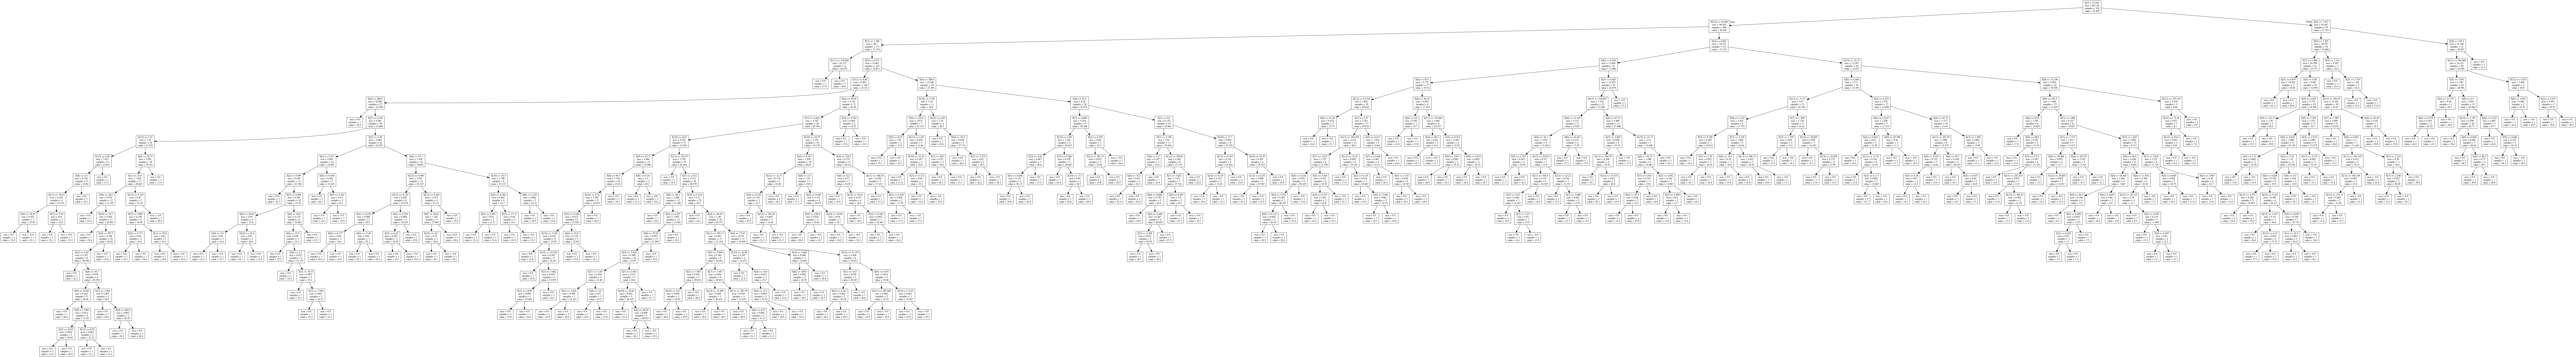

In [4]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(dtr)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [7]:
d = dict()
a = dtr.tree_.feature
for item in a:
    try:
        d[item]+=1
    except KeyError:
        d[item]=1
d.pop(-2)
print(d)

{5: 45, 12: 44, 7: 42, 11: 25, 9: 16, 8: 11, 6: 39, 1: 7, 10: 16, 2: 11, 0: 32, 4: 20}


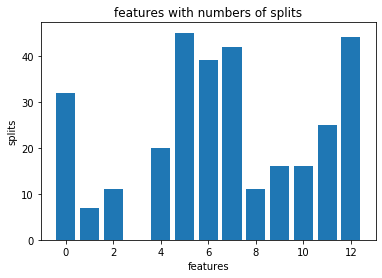

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
x=list(d.keys())
y=list(d.values())
plt.bar(x,y)
plt.xlabel('features')
plt.ylabel('splits')
plt.title('features with numbers of splits')
plt.show()